In [1]:
from PIL import Image, ImageDraw

# Create an image object with a black background
img = Image.new("RGB", (400, 400), color=(0, 0, 0))
draw = ImageDraw.Draw(img)

# Draw two circles with the same radius that overlap
radius = 100
coords1 = (150, 150)
coords2 = (250, 250)
draw.ellipse((coords1[0]-radius, coords1[1]-radius, coords1[0]+radius, coords1[1]+radius), fill=(255,255,255))
draw.ellipse((coords2[0]-radius, coords2[1]-radius, coords2[0]+radius, coords2[1]+radius), fill=(255,255,255))

# Save the image to disk
img.save("overlapping_circles.png")

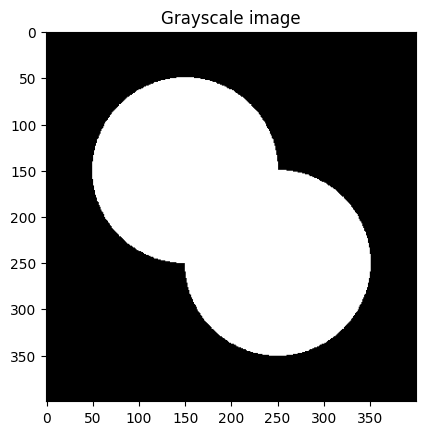

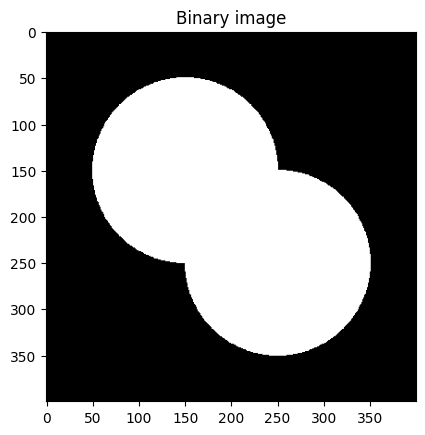

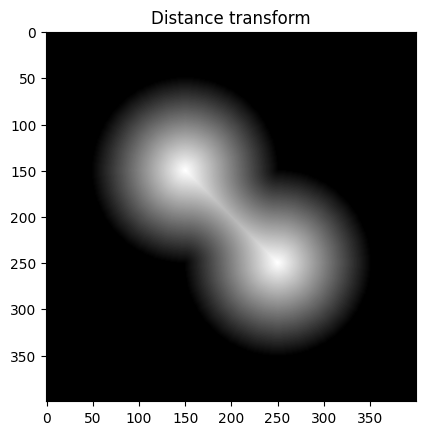

/tmp/ipykernel_275034/3668152737.py:37: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_max = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=img_binary)


Number of local maxima: 2
Local maximum 1: [150 150]
Local maximum 2: [250 250]


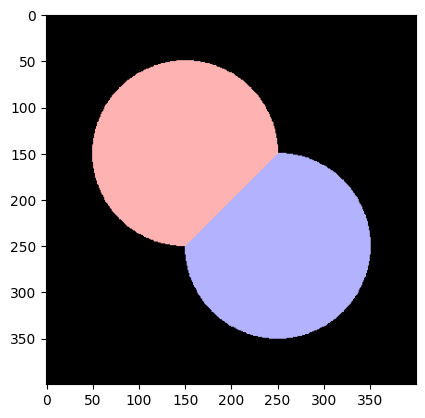

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage.color import label2rgb
from scipy import ndimage as ndi
from skimage.feature import peak_local_max

# read the image and convert it to grayscale
img = plt.imread("overlapping_circles.png")
img_gray = np.mean(img, axis=2)

# plot the grayscale image
plt.imshow(img_gray, cmap="gray")
plt.title("Grayscale image")
plt.show()

# threshold the image to convert it to binary
threshold = threshold_otsu(img_gray)
img_binary = img_gray > threshold

# plot the binary image
plt.imshow(img_binary, cmap="gray")
plt.title("Binary image")
plt.show()

# compute the distance transform of the binary image
distance = ndi.distance_transform_edt(img_binary)

# plot the distance transform
plt.imshow(distance, cmap="gray")
plt.title("Distance transform")
plt.show()

# find local maxima in the distance transform
local_max = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)), labels=img_binary)

num_local_max = np.sum(local_max)
print("Number of local maxima: {}".format(num_local_max))
for i in range(num_local_max):
    print("Local maximum {}: {}".format(i+1, np.argwhere(local_max == 1)[i]))

# apply the watershed algorithm on the distance transform image
segmented = watershed(-distance, markers=ndi.label(local_max)[0], mask=img_binary)

# visualize the segmented image
plt.imshow(label2rgb(segmented, image=img))
plt.show()



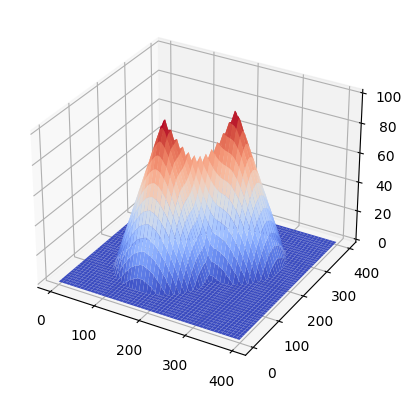

14

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(distance.shape[0]), np.arange(distance.shape[1]))
ax.plot_surface(X, Y, distance, cmap=cm.coolwarm)

def rotate(angle):
    ax.view_init(azim=angle)

plt.show()

fig.canvas.mpl_connect('button_press_event', rotate)

In [4]:
# shape index
from skimage.feature import shape_index

# compute the shape index
shape_index_img = shape_index(distance, sigma=0.1)
shape_index_img

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

Number of cells with shape index between -3/8 and 3/8: 3346


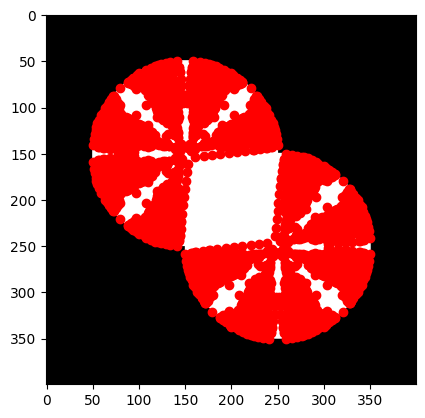

In [8]:
from skimage.feature import shape_index

# compute the shape index
shape_index_img = shape_index(distance, sigma=0.1)

# cells(i, j) whose values are between -3/8 and 3/8
locs = []
for i in range(shape_index_img.shape[0]):
    for j in range(shape_index_img.shape[1]):
        if shape_index_img[i, j] >= 1/8 and shape_index_img[i, j] < 3/8:
            locs.append((i, j))

print("Number of cells with shape index between -3/8 and 3/8: {}".format(len(locs)))

# plot the locations of the cells with shape index between -3/8 and 3/8
plt.imshow(img_gray, cmap="gray")
plt.scatter([loc[1] for loc in locs], [loc[0] for loc in locs], c="r")
plt.show()

In [ ]:
# plot the locations of the cells on the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(distance.shape[0]), np.arange(distance.shape[1]))
ax.plot_surface(X, Y, distance, cmap=cm.coolwarm)

for loc in locs:
    ax.scatter(loc[0], loc[1], distance[loc[0], loc[1]], color="red")

def rotate(angle):
    ax.view_init(azim=angle)

plt.show()

fig.canvas.mpl_connect('button_press_event', rotate)

In [9]:
# save distance transform image
plt.imsave("distance_transform.png", distance, cmap="gray")